In [1]:
import numpy as np   
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
placement = pd.read_csv('college_student_placement_dataset.csv')
placement 

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [3]:
null_values = placement.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [4]:
list(placement.select_dtypes(include='object').columns)

['College_ID', 'Internship_Experience', 'Placement']

In [5]:
placement['College_ID'].value_counts()

College_ID
CLG0062    133
CLG0027    120
CLG0065    119
CLG0075    119
CLG0023    118
          ... 
CLG0060     83
CLG0035     83
CLG0006     83
CLG0054     79
CLG0042     75
Name: count, Length: 100, dtype: int64

In [6]:
college_counts = placement['College_ID'].value_counts(dropna=False).reset_index() 
college_counts.columns = ['College_ID', 'Count']

#Display all rows 
pd.set_option('display.max_rows', None)
print(college_counts)

   College_ID  Count
0     CLG0062    133
1     CLG0027    120
2     CLG0065    119
3     CLG0075    119
4     CLG0023    118
5     CLG0025    118
6     CLG0058    116
7     CLG0073    116
8     CLG0026    115
9     CLG0067    114
10    CLG0049    114
11    CLG0066    113
12    CLG0045    113
13    CLG0032    113
14    CLG0078    113
15    CLG0088    112
16    CLG0034    112
17    CLG0005    112
18    CLG0094    110
19    CLG0012    110
20    CLG0086    110
21    CLG0029    109
22    CLG0001    109
23    CLG0051    108
24    CLG0056    108
25    CLG0077    107
26    CLG0038    106
27    CLG0061    106
28    CLG0020    105
29    CLG0030    105
30    CLG0072    105
31    CLG0080    105
32    CLG0098    105
33    CLG0010    105
34    CLG0013    105
35    CLG0046    105
36    CLG0039    104
37    CLG0069    104
38    CLG0095    102
39    CLG0092    102
40    CLG0047    102
41    CLG0071    102
42    CLG0041    102
43    CLG0084    102
44    CLG0014    102
45    CLG0097    101
46    CLG0090

In [7]:
placement.replace({'College_ID': {
    'CLG0062': 0, 'CLG0027': 1, 'CLG0065': 2, 'CLG0075': 3, 'CLG0023': 4, 'CLG0025': 5,
    'CLG0058': 6, 'CLG0073': 7, 'CLG0026': 8, 'CLG0067': 9, 'CLG0049': 10, 'CLG0066': 11,
    'CLG0045': 12, 'CLG0032': 13, 'CLG0078': 14, 'CLG0088': 15, 'CLG0034': 16, 'CLG0005': 17,
    'CLG0094': 18, 'CLG0012': 19, 'CLG0086': 20, 'CLG0029': 21, 'CLG0001': 22, 'CLG0051': 23,
    'CLG0056': 24, 'CLG0077': 25, 'CLG0038': 26, 'CLG0061': 27, 'CLG0020': 28, 'CLG0030': 29,
    'CLG0072': 30, 'CLG0080': 31, 'CLG0098': 32, 'CLG0010': 33, 'CLG0013': 34, 'CLG0046': 35,
    'CLG0039': 36, 'CLG0069': 37, 'CLG0095': 38, 'CLG0092': 39, 'CLG0047': 40, 'CLG0071': 41,
    'CLG0041': 42, 'CLG0084': 43, 'CLG0014': 44, 'CLG0097': 45, 'CLG0090': 46, 'CLG0091': 47,
    'CLG0096': 48, 'CLG0043': 49, 'CLG0085': 50, 'CLG0033': 51, 'CLG0022': 52, 'CLG0081': 53,
    'CLG0003': 54, 'CLG0031': 55, 'CLG0100': 56, 'CLG0087': 57, 'CLG0044': 58, 'CLG0021': 59,
    'CLG0009': 60, 'CLG0082': 61, 'CLG0015': 62, 'CLG0083': 63, 'CLG0040': 64, 'CLG0016': 65,
    'CLG0017': 66, 'CLG0074': 67, 'CLG0068': 68, 'CLG0011': 69, 'CLG0008': 70, 'CLG0059': 71,
    'CLG0007': 72, 'CLG0036': 73, 'CLG0089': 74, 'CLG0064': 75, 'CLG0079': 76, 'CLG0018': 77,
    'CLG0053': 78, 'CLG0057': 79, 'CLG0004': 80, 'CLG0052': 81, 'CLG0050': 82, 'CLG0019': 83,
    'CLG0093': 84, 'CLG0099': 85, 'CLG0063': 86, 'CLG0028': 87, 'CLG0076': 88, 'CLG0002': 89,
    'CLG0024': 90, 'CLG0037': 91, 'CLG0055': 92, 'CLG0070': 93, 'CLG0048': 94, 'CLG0060': 95,
    'CLG0035': 96, 'CLG0006': 97, 'CLG0054': 98, 'CLG0042': 99
}}, inplace=True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_1164\2577794124.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  placement.replace({'College_ID': {


In [8]:
placement['College_ID'].value_counts()

College_ID
0     133
1     120
2     119
3     119
4     118
5     118
6     116
7     116
8     115
9     114
10    114
11    113
12    113
13    113
14    113
15    112
16    112
17    112
18    110
19    110
20    110
21    109
22    109
23    108
24    108
25    107
26    106
27    106
28    105
29    105
30    105
31    105
32    105
33    105
34    105
35    105
36    104
37    104
38    102
39    102
40    102
41    102
42    102
43    102
44    102
45    101
46    101
47    100
48     99
49     99
50     98
51     98
52     98
53     97
54     97
55     97
56     97
57     97
58     96
59     96
60     96
61     95
62     95
63     95
64     95
65     95
66     95
67     94
68     94
69     94
70     94
71     94
72     94
73     93
74     93
75     93
76     92
77     92
78     91
79     91
80     91
81     90
82     90
83     90
84     90
85     89
86     88
87     88
88     86
89     86
90     86
91     86
92     86
93     85
94     85
95     83
96     83
97     83
98     79

In [9]:
placement['Internship_Experience'].value_counts()

Internship_Experience
No     6036
Yes    3964
Name: count, dtype: int64

In [10]:
placement.replace({'Internship_Experience':{'No':0, 'Yes':1}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_1164\1828077475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  placement.replace({'Internship_Experience':{'No':0, 'Yes':1}}, inplace=True)


In [11]:
placement['Internship_Experience'].value_counts()

Internship_Experience
0    6036
1    3964
Name: count, dtype: int64

In [12]:
placement['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [13]:
placement.replace({'Placement':{'No':0, 'Yes':1}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_1164\1225012702.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  placement.replace({'Placement':{'No':0, 'Yes':1}}, inplace=True)


In [14]:
placement['Placement'].value_counts()

Placement
0    8341
1    1659
Name: count, dtype: int64

<Axes: >

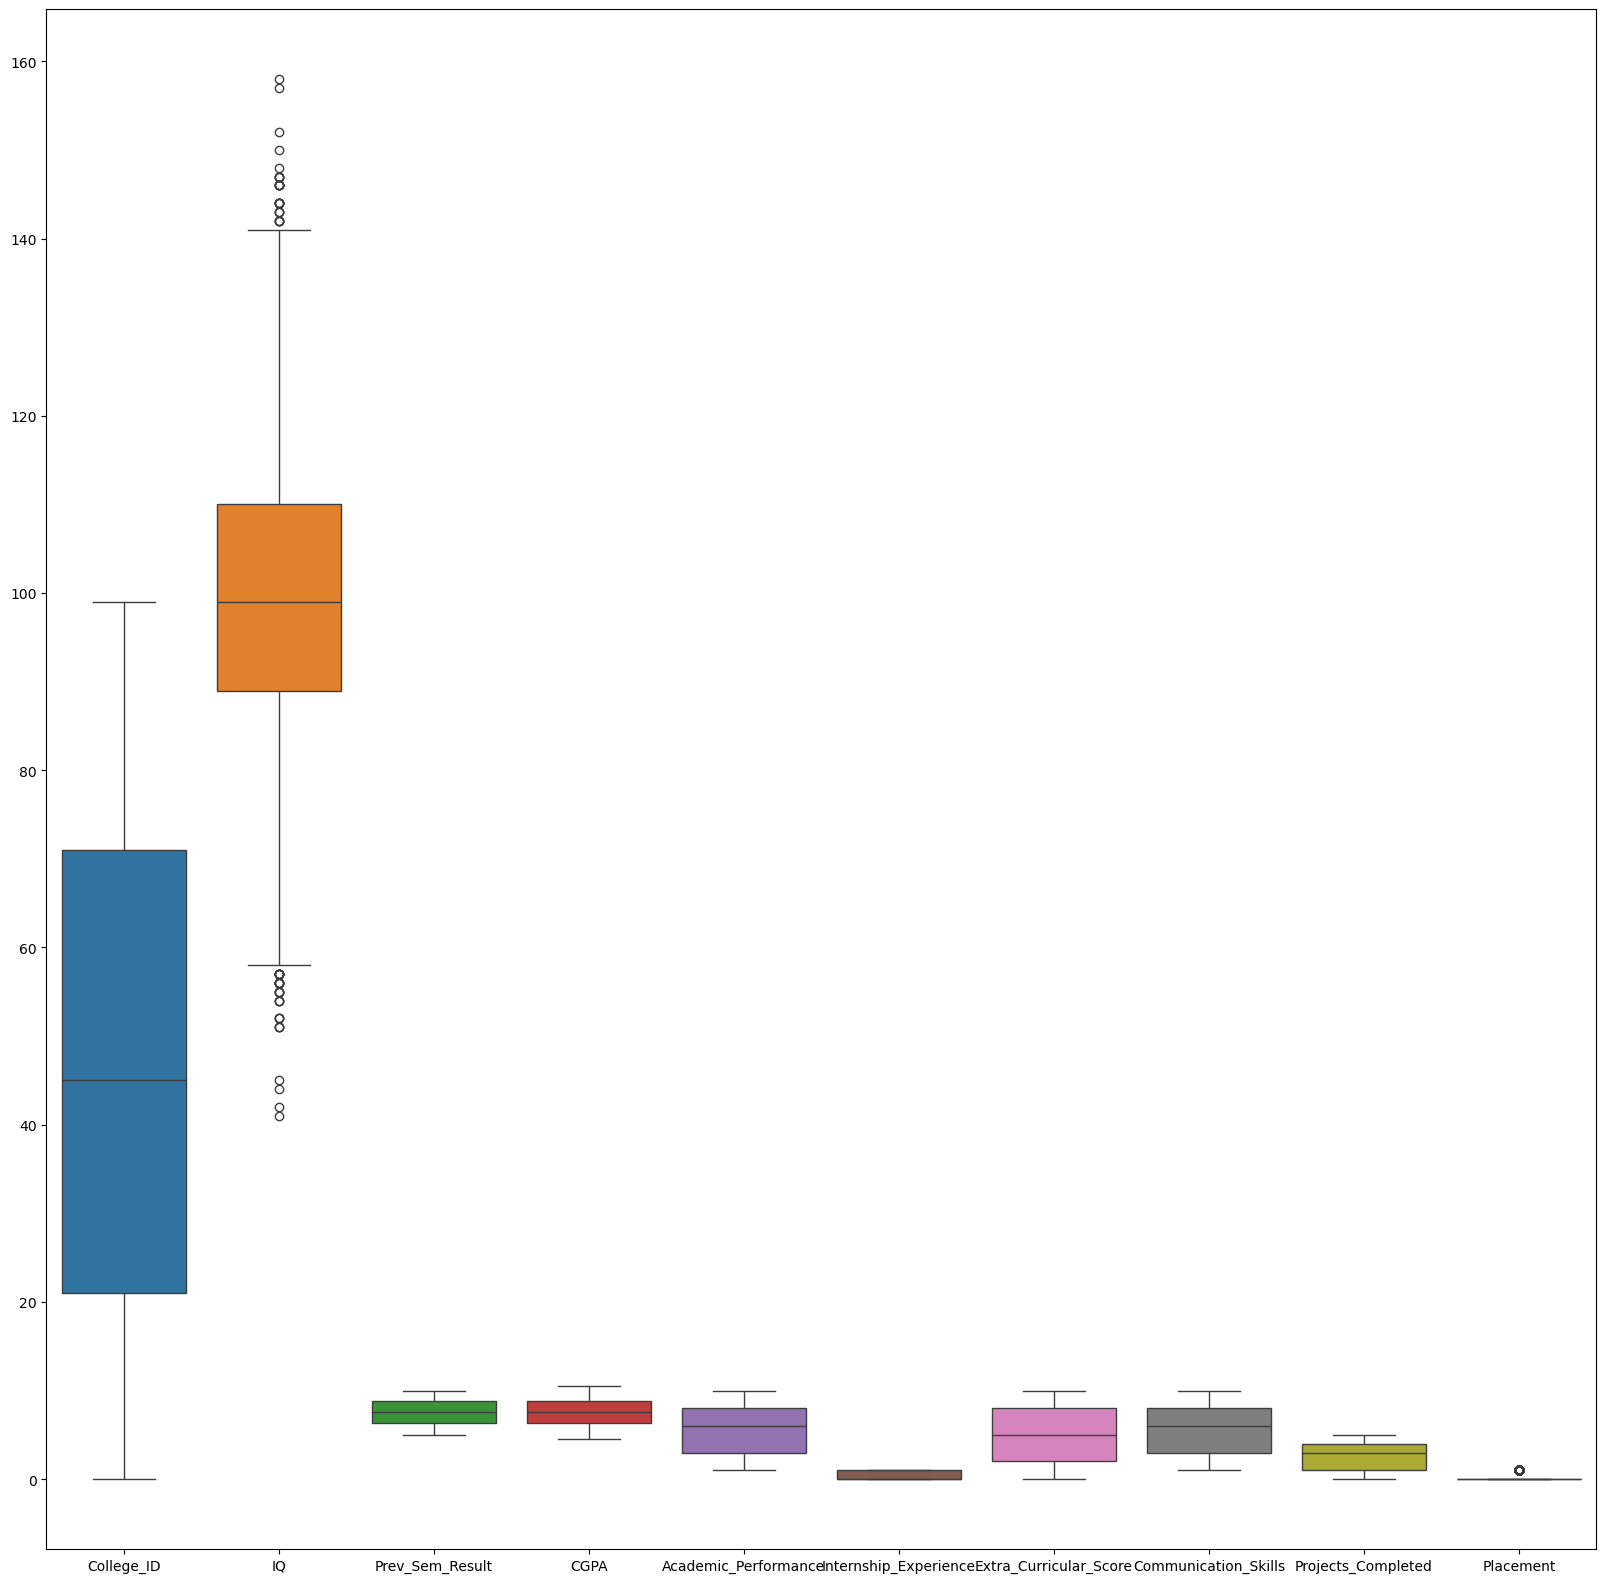

In [15]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = placement, ax=ax)

In [16]:
# Exclude 'Placement' column from outlier detection
numeric_cols = placement.select_dtypes(include=['number']).columns.drop('Placement')

Q1 = placement[numeric_cols].quantile(0.25)
Q3 = placement[numeric_cols].quantile(0.75)

#Calculate IQR - Inter Quartile Range 
IQR = Q3 - Q1

#Determine the outlier boundaries 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

#Create a mask for data within the IQR boundaries 
mask = ~((placement[numeric_cols] < lower_bound) | (placement[numeric_cols] > upper_bound)).any(axis=1)

#Remove outliers 
cleaned_data = placement[mask]

<Axes: >

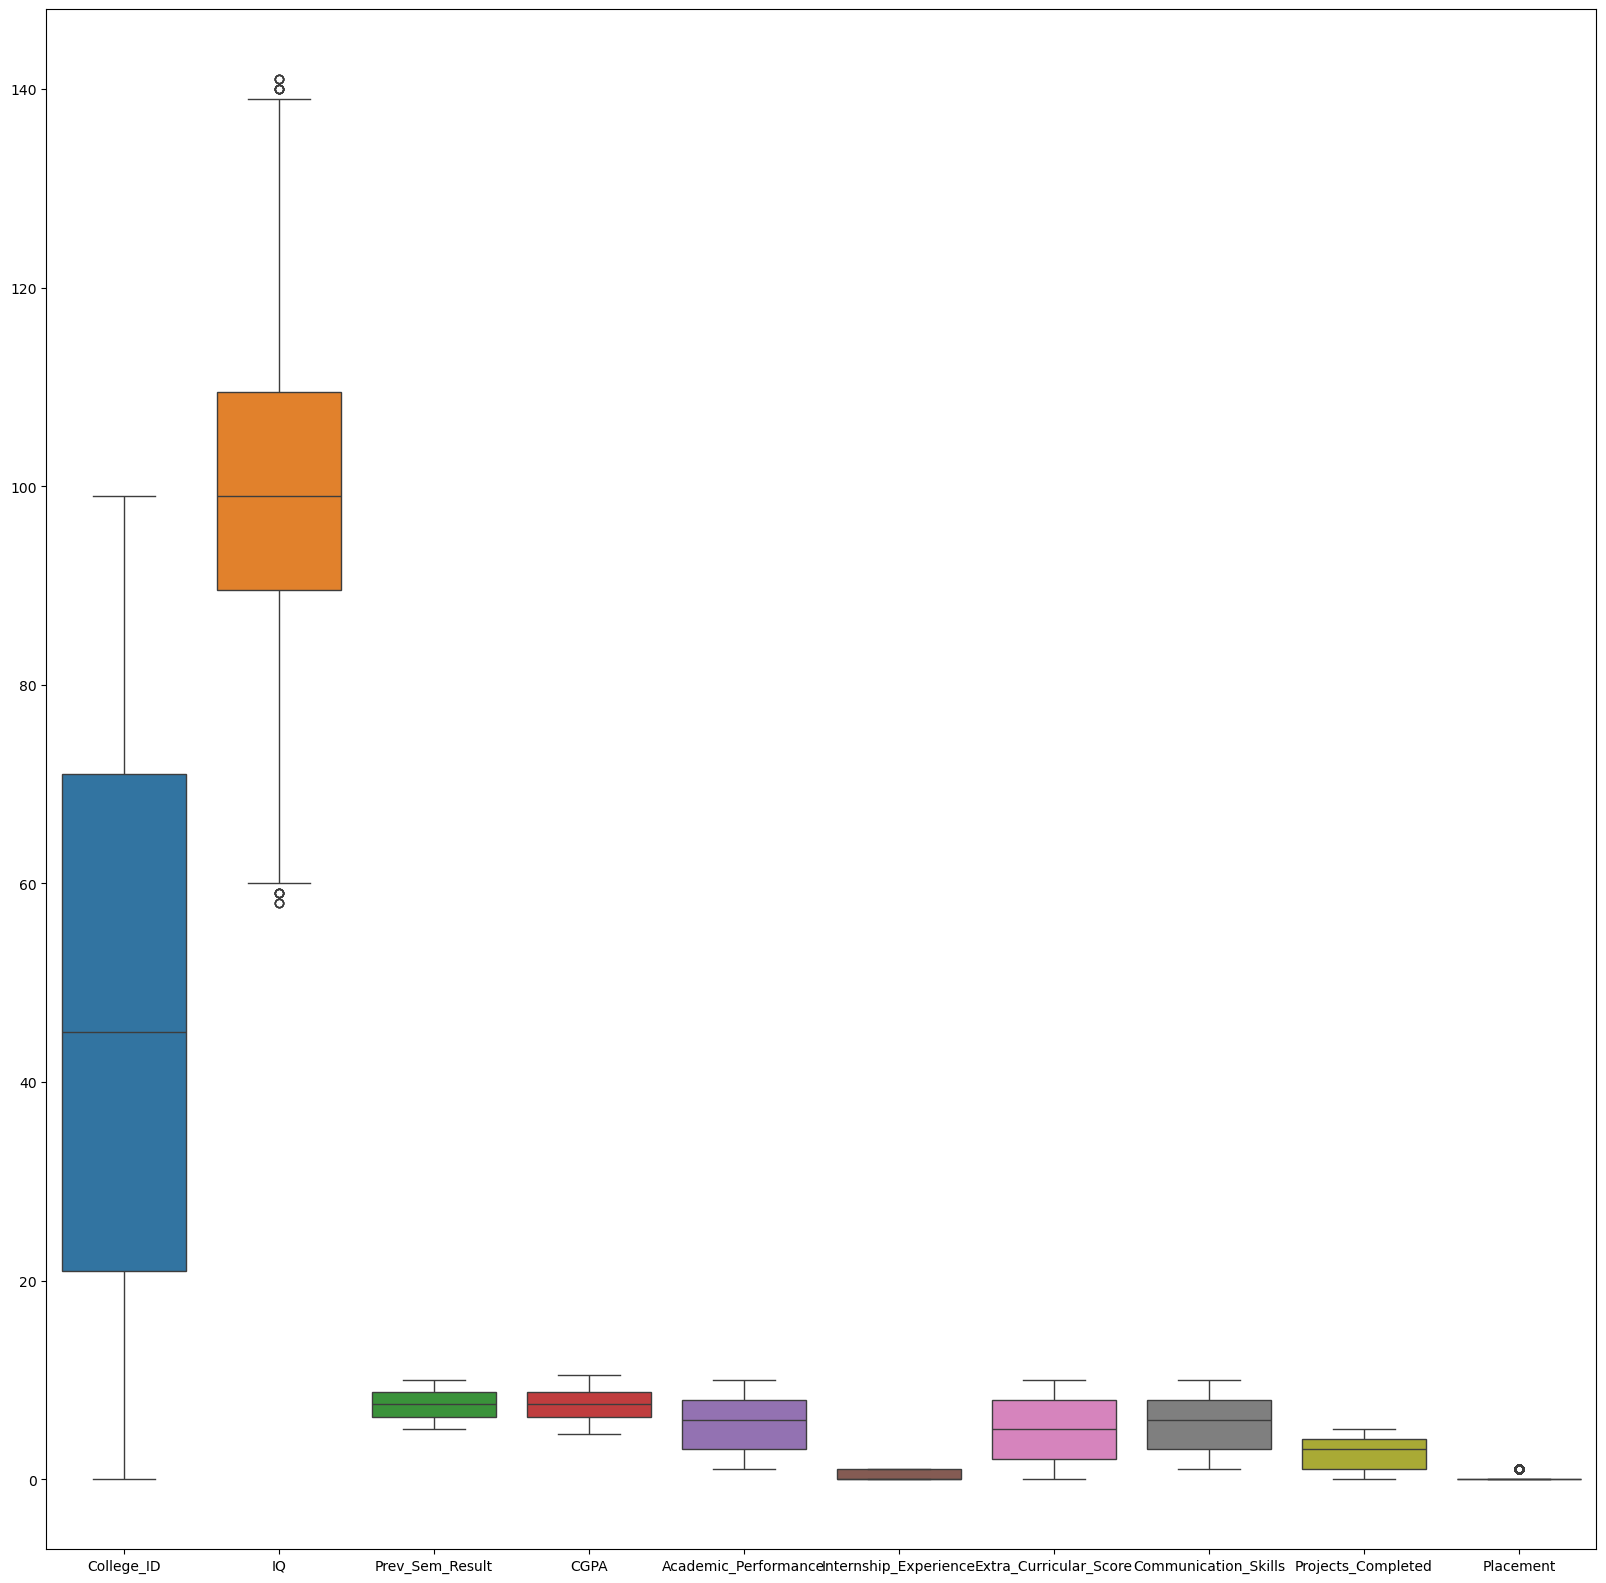

In [17]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(cleaned_data,ax=ax)

In [18]:
placement.shape

(10000, 10)

In [19]:
cleaned_data.shape

(9939, 10)

In [20]:
correlation = cleaned_data.corr()
correlation

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,-0.006660,0.008184,0.008412,-0.012464,0.018362,-0.007169,-0.001709,0.022639,0.000854
IQ,-0.006660,1.000000,-0.003299,-0.003320,-0.009726,0.001985,-0.009101,-0.013168,0.016550,0.286462
Prev_Sem_Result,0.008184,-0.003299,1.000000,0.980751,-0.005173,-0.013189,0.008712,-0.017338,0.018109,0.316862
CGPA,0.008412,-0.003320,0.980751,1.000000,-0.002350,-0.012291,0.010709,-0.018294,0.020364,0.320609
Academic_Performance,-0.012464,-0.009726,-0.005173,-0.002350,1.000000,0.025129,0.011118,-0.019508,-0.014174,-0.014945
Internship_Experience,0.018362,0.001985,-0.013189,-0.012291,0.025129,1.000000,0.001842,-0.019948,-0.011271,-0.005067
Extra_Curricular_Score,-0.007169,-0.009101,0.008712,0.010709,0.011118,0.001842,1.000000,0.003483,0.007736,-0.006365
Communication_Skills,-0.001709,-0.013168,-0.017338,-0.018294,-0.019508,-0.019948,0.003483,1.000000,-0.003374,0.322762
Projects_Completed,0.022639,0.016550,0.018109,0.020364,-0.014174,-0.011271,0.007736,-0.003374,1.000000,0.218503
Placement,0.000854,0.286462,0.316862,0.320609,-0.014945,-0.005067,-0.006365,0.322762,0.218503,1.000000


<Axes: >

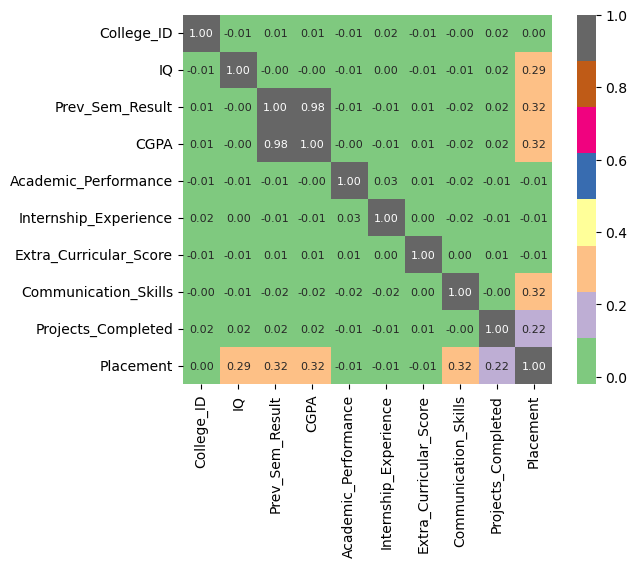

In [21]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Accent')

In [22]:
cleaned_data['Placement'].value_counts()

Placement
0    8296
1    1643
Name: count, dtype: int64

In [ ]:
x = cleaned_data.drop('Placement', axis=1)
x

In [ ]:
y = cleaned_data['Placement']
y 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [ ]:
x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Model fitting
model.fit(x_train,y_train)

In [ ]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of training data',train_data_accuracy)

In [ ]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of testing data',test_data_accuracy)

In [ ]:
cm = confusion_matrix(test_data_predict, y_test)
cm

In [ ]:
sns.heatmap(cm, annot = True, annot_kws = {'size':20}, fmt = '.2f', cmap = 'cividis', square = True,
           xticklabels = ['predicted_positive','predicted_negative'],
           yticklabels = ['actual_positive','actual_negative'])
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(test_data_predict,y_test))

In [ ]:
# To convert dataset into CSV format inorder to take the input dataset
cleaned_data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
# Prediction using a sample data
input_data = (41, 123, 6.68,6.58,5,	0,7,8,2)    # Actual = Bad Quality(5)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction[0]==1:
    print('The student has got placement')
else:
    print('The student is not placed')